In [1]:
from src.IOSystem import IOSystem
from src.SupplyChain import SupplyChain

In [2]:
database = IOSystem(year=2022, language="Deutsch").load()

2025-04-19 11:29:40,711 - INFO - Fast database was found - Loading...
2025-04-19 11:29:41,888 - INFO - Database has been loaded successfully in 1.177 seconds.


In [3]:
database.Index.sector_classification

['Wirtschaftssektor', 'Abschnitt', 'Unterabschnitt', 'Abteilung', 'Sektor']

In [5]:
supplychain = SupplyChain(database=database, Kontinent="Europa", Sector="Textilien")
supplychain

2025-04-19 11:29:55,251 - INFO - Calculating regional impact matrices...

2025-04-19 11:30:08,170 - INFO - Calculations successful.



SupplyChain(Number of Indices: 6200, Hierarchy levels: {'Kontinent': 'Europa', 'Region': None, 'Wirtschaftssektor': None, 'Abschnitt': None, 'Unterabschnitt': None, 'Abteilung': None, 'Sektor': None})

In [7]:
supplychain = SupplyChain(database=database, select=True)

In [8]:
supplychain

SupplyChain(Number of Indices: 4092, Hierarchy levels: {'Kontinent': 'Europa', 'Region': None, 'Wirtschaftssektor': 'Sekundär', 'Abschnitt': None, 'Unterabschnitt': None, 'Abteilung': None, 'Sektor': None})

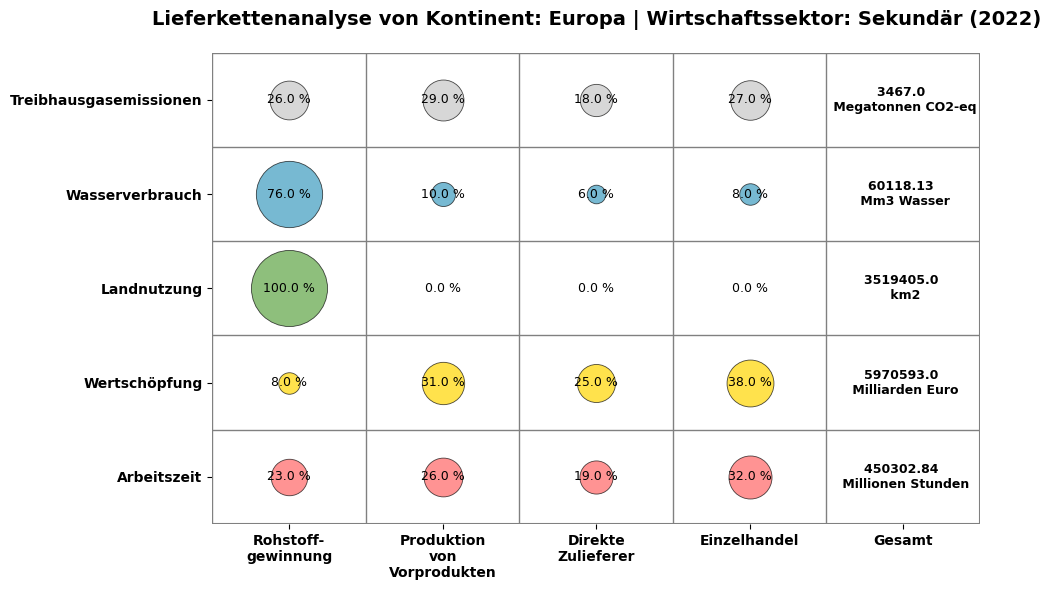

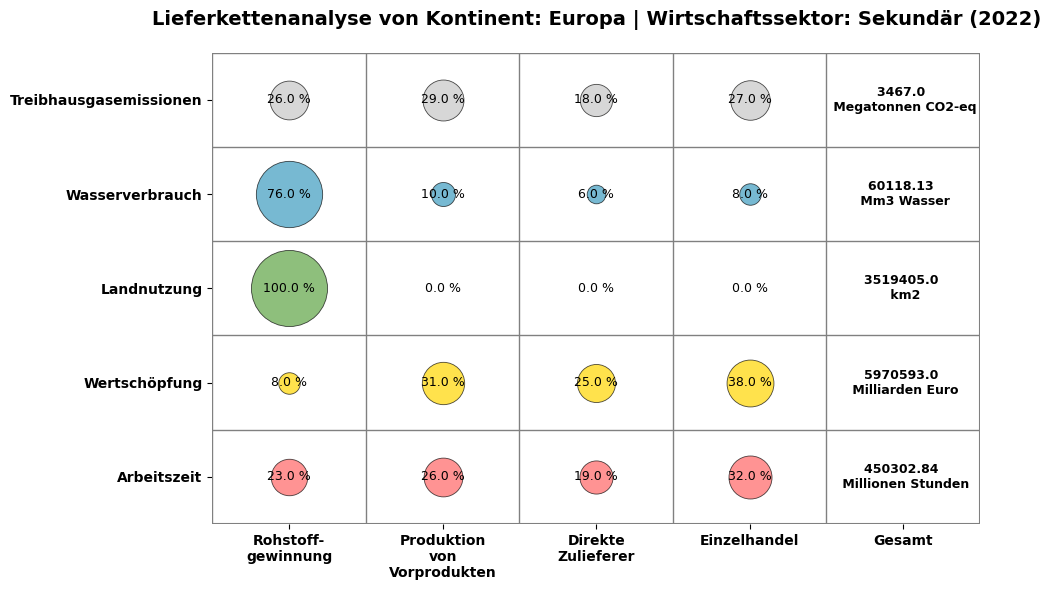

In [9]:
supplychain.plot_supply_chain(impacts=["Treibhausgasemissionen", "Wasserverbrauch", "Landnutzung", "Wertschöpfung", "Arbeitszeit"])

In [10]:
supplychain.calculate_all(impacts=["Treibhausgasemissionen", "Wasserverbrauch", "Landnutzung", "Wertschöpfung", "Arbeitszeit"], relative=False, decimal_places=5)

,Rohstoff-\ngewinnung,Produktion\nvon\nVorprodukten,Direkte\nZulieferer,Einzelhandel,Gesamt,Einheit,Farbe
Treibhausgasemissionen,911.39,1010.80,639.80,932.02,3467.00,Megatonnen CO2-eq,#c7c7c6
Wasserverbrauch,45933.28,5840.58,3627.69,4830.00,60118.13,Mm3 Wasser,#3e9cbf
Landnutzung,3519405.00,15589.82,11783.08,0.00,3519405.00,km2,#5ea545
Wertschöpfung,468315.56,1835120.62,1470544.75,2268328.00,5970593.00,Milliarden Euro,#FFD700
Arbeitszeit,105397.53,115255.76,85872.47,145197.92,450302.84,Millionen Stunden,#ff6666


/Users/lukasharzbecker/exiobase_explorer/src/SupplyChain.py:457: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels([f"{int(tick)}%" for tick in cbar.get_ticks()])


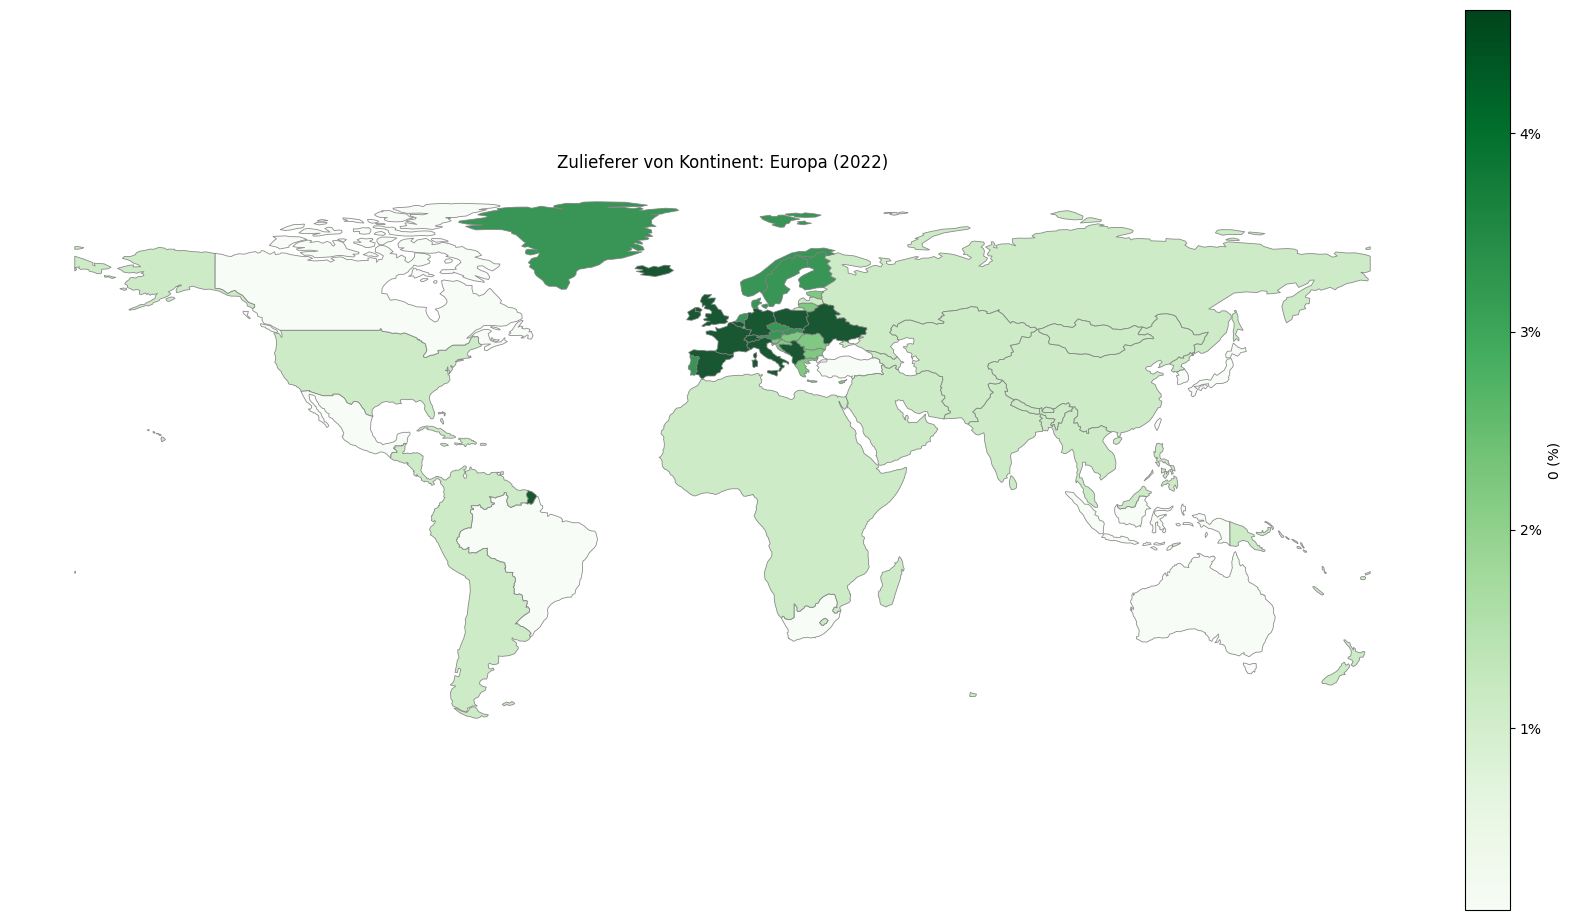

In [6]:
supplychain.plot_subcontractors(color="Greens")